In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
beatles_df = pd.read_csv('raw_data/the_beatles_songs_dataset.csv')
beatles_df

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
0,spotify:track:2HvTGx5fzFGpHSyRNvXd9T,12-bar Original,1965,Anthology 2,31,175,9,1,122.678,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,spotify:track:0hKRSZhUGEhKU6aNSPBACZ,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,65,335,4,0,163.219,4,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,18.0,1.0,1.0
2,spotify:track:5J2CHimS7dWYMImCHkEFaJ,A Hard Day's Night,1964,A Hard Day's Night,71,152,0,1,138.514,4,...,3.0,1.0,2.0,8.0,18.0,11.0,19.0,19.0,15.0,41.0
3,spotify:track:5RuE7nwp4TWsRvLXG7Yjy1,A Shot of Rhythm and Blues,1963,Live at the BBC,35,136,2,1,128.919,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,spotify:track:7fh53ta3vAOGJMQ4i5tCHe,A Taste of Honey,1963,Please Please Me,51,163,1,0,101.408,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,spotify:track:70HNt0eoBVqr4ss68U8x3B,You're Going to Lose That Girl,1965,Help!,57,140,4,1,131.975,4,...,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN
271,spotify:track:4F1AgKpuFRMLEgtPETVwZk,You've Got to Hide Your Love Away,1965,Help!,73,131,7,1,184.267,3,...,NaN,NaN,NaN,NaN,42.0,31.0,49.0,NaN,37.0,46.0
272,spotify:track:7rgUYidQh5tH0YlXCoKaYJ,You've Really Got a Hold on Me,1963,With the Beatles,54,182,9,1,77.643,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,spotify:track:3FuRBetiFz4ijeLdGCxQ5Y,Young Blood,1963,Live at the BBC,29,116,2,1,68.111,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing covers from other bands and to only work with original Beatles songs

In [79]:
beatles_df = beatles_df[beatles_df.Cover != 'Y']
beatles_df = beatles_df.drop(['Popularity', 'Duration', 'Key', 'Mode','Tempo', 'Time_signature', 'Valence', 'Danceability', 'Energy', 'Loudness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness'], axis=1)
beatles_df = beatles_df.drop(['URI','Single certification', 'Genre', 'Styles', 'Moods', 'Other releases', 'Cover'], axis=1)
beatles_df

,Title,Year,Album,Album debut,Single A side,Single B side,Themes,Songwriter(s),Lead vocal(s),Covered_by,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
0,12-bar Original,1965,Anthology 2,Anthology 2,NaN,NaN,NaN,"Lennon, McCartney, Harrison and Starkey",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,Sgt. Pepper's Lonely Hearts Club Band,Sgt. Pepper's Lonely Hearts Club Band / With a...,A Day in the Life,NaN,Lennon and McCartney,Lennon and McCartney,27.0,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,18.0,1.0,1.0
2,A Hard Day's Night,1964,A Hard Day's Night,UK: A Hard Day's Night US: 1962-1966,A Hard Day's Night,Things We Said Today; I Should Have Known Better,"Everyday Life, In Love, Relationships",Lennon,"Lennon, with McCartney",35.0,...,3.0,1.0,2.0,8.0,18.0,11.0,19.0,19.0,15.0,41.0
5,Across the Universe,1968,Let It Be,Let It Be,NaN,NaN,"Introspection, Awareness, In Love, Nature, Rel...",Lennon,Lennon,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,30.0,32.0,NaN
8,All I've Got to Do,1963,With the Beatles,UK: With the Beatles US: Meet The Beatles!,NaN,NaN,NaN,Lennon,Lennon,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,You Won't See Me,1965,Rubber Soul,Rubber Soul,NaN,NaN,"Breakup, Regret",McCartney,McCartney,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,You'll Be Mine,1960,Anthology 1,Anthology 1,NaN,NaN,NaN,Lennon and McCartney,McCartney,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,You're Going to Lose That Girl,1965,Help!,Help!,NaN,NaN,NaN,Lennon,Lennon,2.0,...,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN
271,You've Got to Hide Your Love Away,1965,Help!,Help!,NaN,NaN,"Breakup, Feeling Blue, Heartache, Introspectio...",Lennon,Lennon,21.0,...,NaN,NaN,NaN,NaN,42.0,31.0,49.0,NaN,37.0,46.0


Working with songs covered by other bands, with more than 10 covers due to the amount of songs covered

In [80]:
beatles_df_covers = beatles_df.copy()
column_to_clean = 'Covered_by'
beatles_df_covers = beatles_df_covers.dropna(subset=column_to_clean)
beatles_df_covers = beatles_df_covers.query('Covered_by>10')
beatles_df_covers

,Title,Year,Album,Album debut,Single A side,Single B side,Themes,Songwriter(s),Lead vocal(s),Covered_by,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,Sgt. Pepper's Lonely Hearts Club Band,Sgt. Pepper's Lonely Hearts Club Band / With a...,A Day in the Life,NaN,Lennon and McCartney,Lennon and McCartney,27.0,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,18.0,1.0,1.0
2,A Hard Day's Night,1964,A Hard Day's Night,UK: A Hard Day's Night US: 1962-1966,A Hard Day's Night,Things We Said Today; I Should Have Known Better,"Everyday Life, In Love, Relationships",Lennon,"Lennon, with McCartney",35.0,...,3.0,1.0,2.0,8.0,18.0,11.0,19.0,19.0,15.0,41.0
5,Across the Universe,1968,Let It Be,Let It Be,NaN,NaN,"Introspection, Awareness, In Love, Nature, Rel...",Lennon,Lennon,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,30.0,32.0,NaN
9,All My Loving,1963,With the Beatles,UK: With the Beatles US: Meet The Beatles!,All My Loving,This Boy,"Day Driving, In Love, New Love, Partying, Road...",McCartney,McCartney,20.0,...,NaN,NaN,NaN,NaN,46.0,44.0,35.0,43.0,29.0,NaN
12,All You Need Is Love,1967,Magical Mystery Tour,Magical Mystery Tour,All You Need Is Love,"Baby, You're a Rich Man","Affection/Fondness, Affirmation, In Love",Lennon,Lennon,20.0,...,NaN,1.0,NaN,15.0,23.0,21.0,24.0,7.0,33.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,When I'm Sixty Four,1966,Sgt. Pepper's Lonely Hearts Club Band,Sgt. Pepper's Lonely Hearts Club Band,NaN,NaN,"In Love, Playful",McCartney,McCartney,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,While My Guitar Gently Weeps,1968,The Beatles,The Beatles,"Ob-La-Di, Ob-La-Da",While My Guitar Gently Weeps,"Feeling Blue, Heartache",Harrison,Harrison,27.0,...,NaN,NaN,NaN,NaN,4.0,10.0,8.0,12.0,13.0,32.0
256,With a Little Help From My Friends,1967,Sgt. Pepper's Lonely Hearts Club Band,Sgt. Pepper's Lonely Hearts Club Band,Sgt. Pepper's Lonely Hearts Club Band / With a...,A Day in the Life,"Affection/Fondness, Comfort",Lennon and McCartney,Starkey,31.0,...,NaN,NaN,NaN,NaN,22.0,NaN,50.0,23.0,26.0,NaN
262,Yesterday,1965,Help!,UK: Help! US: Yesterday and Today,Yesterday,Act Naturally,"Breakup, Feeling Blue, Heartache",McCartney,McCartney,70.0,...,NaN,1.0,4.0,12.0,12.0,4.0,22.0,3.0,6.0,39.0


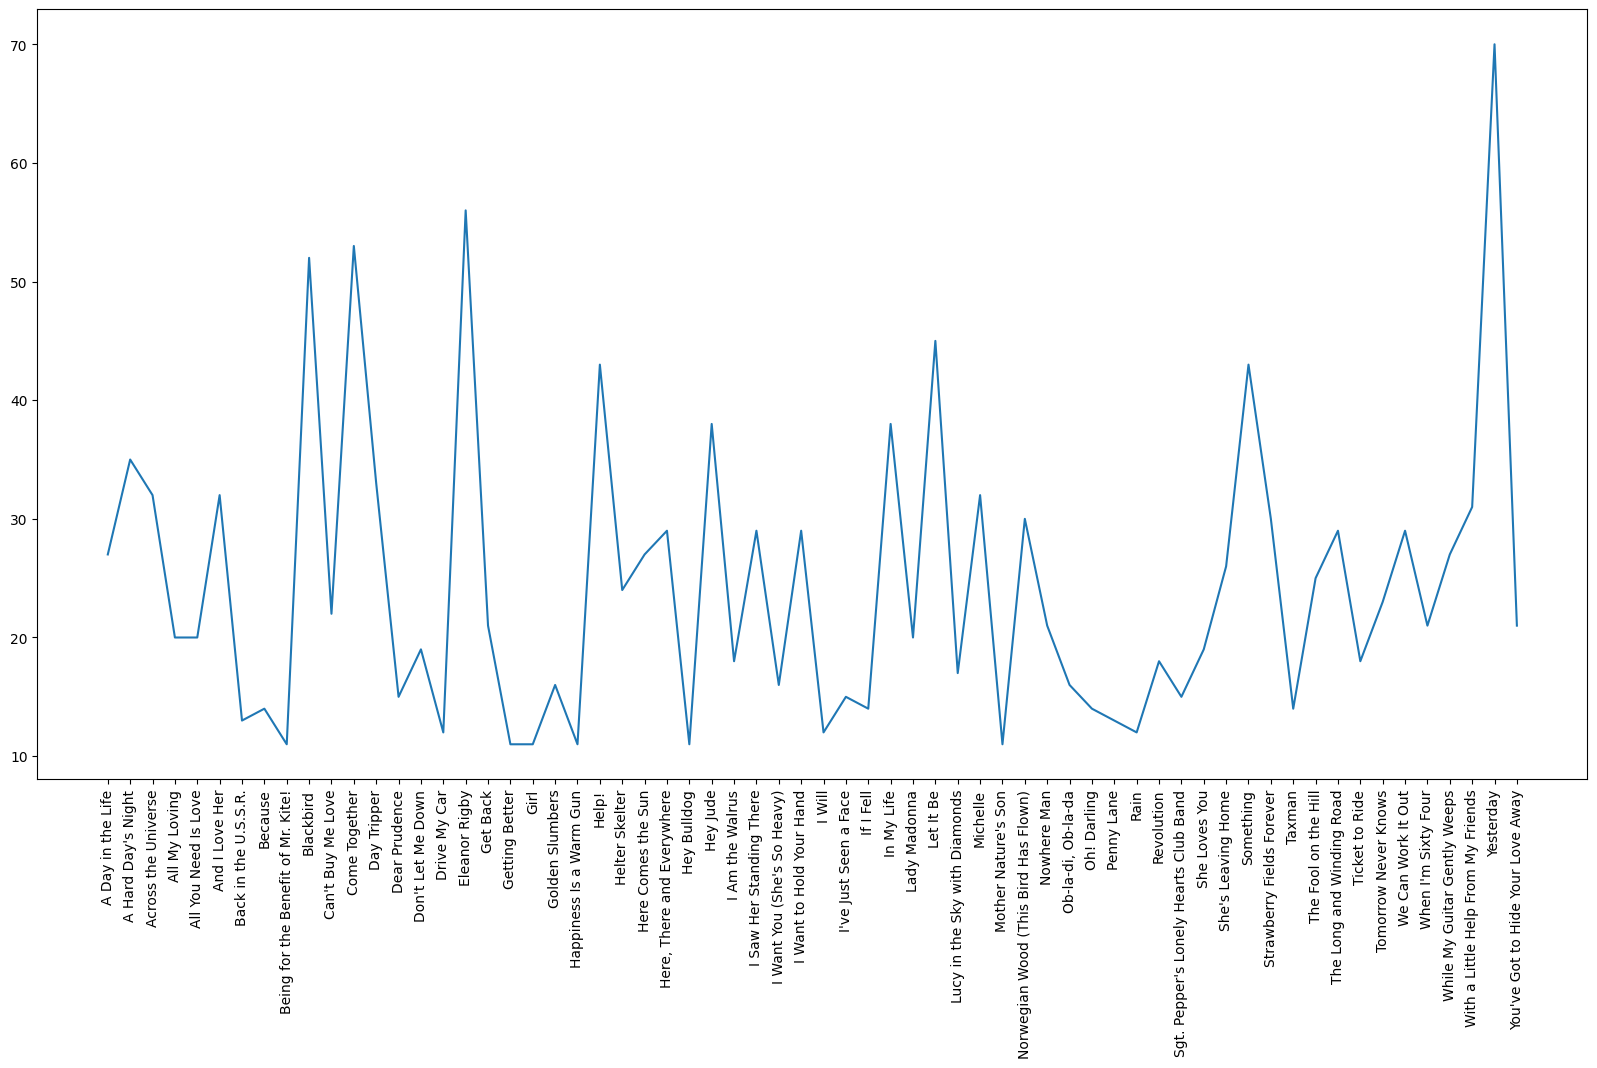

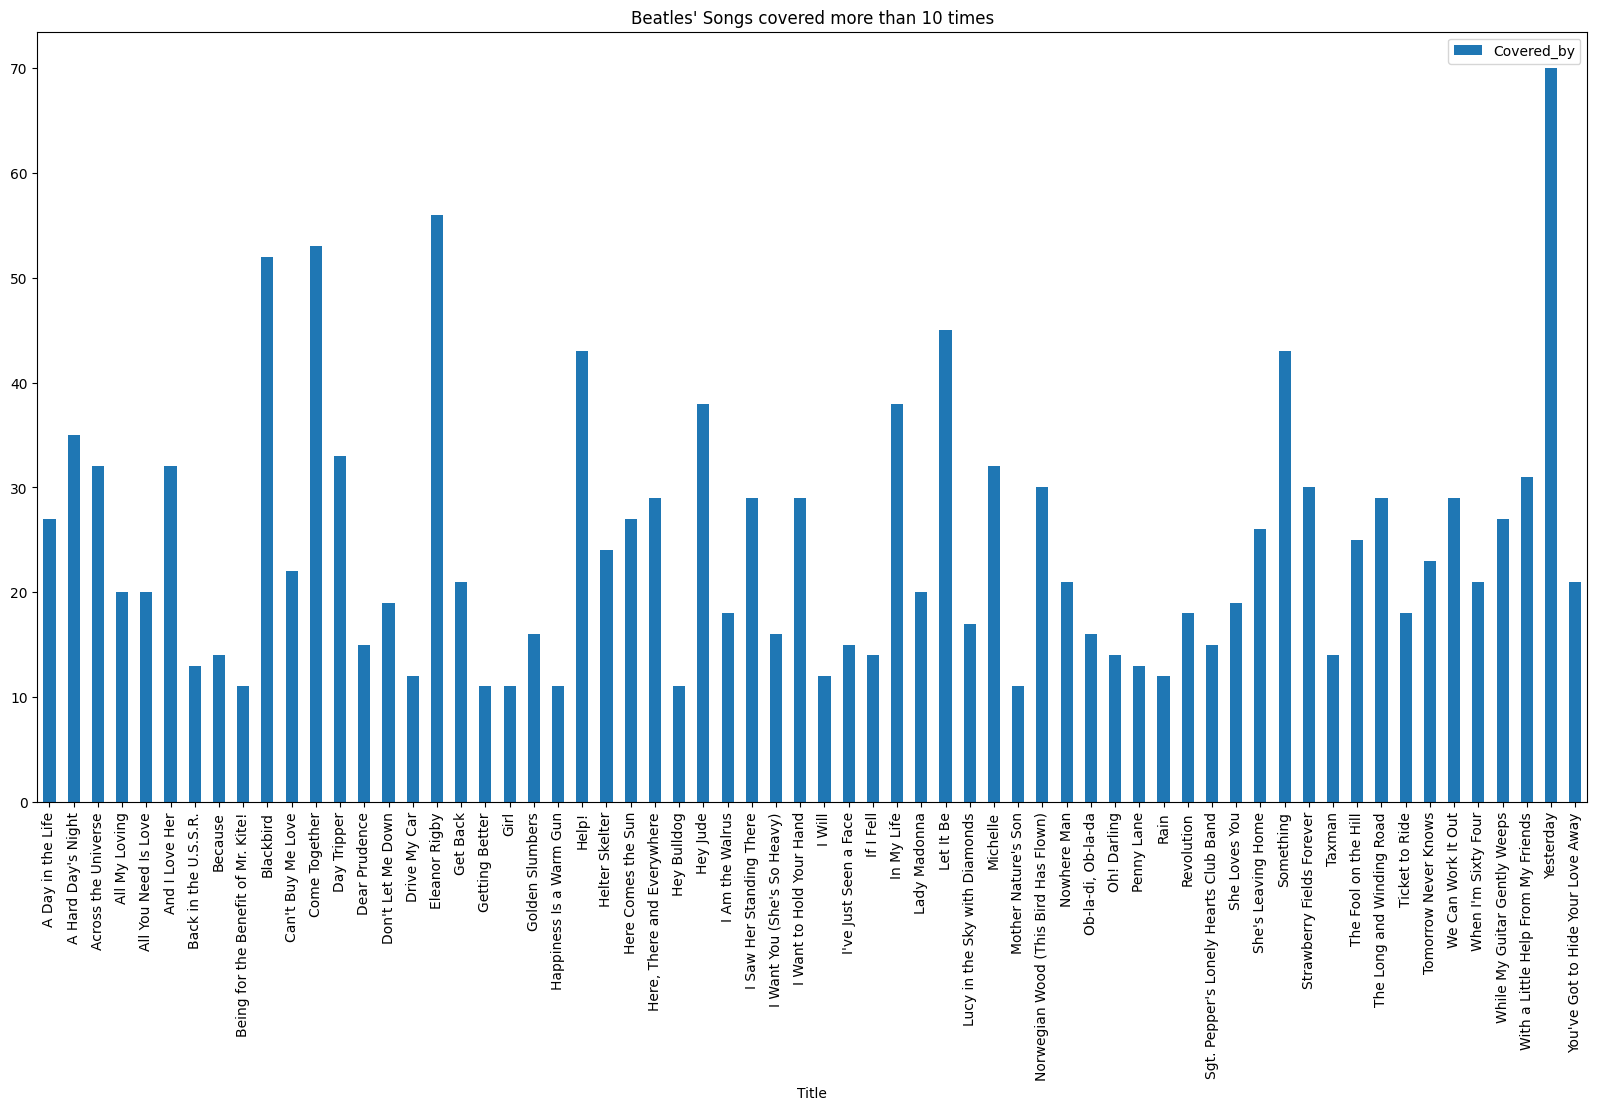

In [81]:
plt.figure(figsize=(20,10))
plt.plot(beatles_df_covers['Title'], beatles_df_covers['Covered_by'])
plt.xticks(rotation=90)

beatles_df_covers.plot(x='Title', y='Covered_by', kind='bar') 
plt.gcf().set_size_inches((20, 10))  
plt.title("Beatles' Songs covered more than 10 times")


plt.show()

In [83]:
beatles_df_top50 = beatles_df.copy()
column_to_clean_3 = 'Top 50 (Billboard)'
beatles_df_top50 = beatles_df_top50.dropna(subset=column_to_clean_3)
beatles_df_top50




,Title,Year,Album,Album debut,Single A side,Single B side,Themes,Songwriter(s),Lead vocal(s),Covered_by,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
2,A Hard Day's Night,1964,A Hard Day's Night,UK: A Hard Day's Night US: 1962-1966,A Hard Day's Night,Things We Said Today; I Should Have Known Better,"Everyday Life, In Love, Relationships",Lennon,"Lennon, with McCartney",35.0,...,3.0,1.0,2.0,8.0,18.0,11.0,19.0,19.0,15.0,41.0
12,All You Need Is Love,1967,Magical Mystery Tour,Magical Mystery Tour,All You Need Is Love,"Baby, You're a Rich Man","Affection/Fondness, Affirmation, In Love",Lennon,Lennon,20.0,...,NaN,1.0,NaN,15.0,23.0,21.0,24.0,7.0,33.0,NaN
13,And I Love Her,1964,A Hard Day's Night,UK: A Hard Day's Night US: Something New,And I Love Her,If I Fell,"New Love, In Love, Relationships","McCartney, with Lennon",McCartney,32.0,...,NaN,12.0,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
21,"Baby, You're a Rich Man",1967,Magical Mystery Tour,Magical Mystery Tour,All You Need Is Love,"Baby, You're a Rich Man",NaN,Lennon and McCartney,Lennon,3.0,...,NaN,34.0,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN
31,Can't Buy Me Love,1964,A Hard Day's Night,UK: A Hard Day's Night US: Hey Jude,Can't Buy Me Love,You Can't Do That,"Awareness, In Love, Passion, Romance",McCartney,"McCartney, with Lennon",22.0,...,3.0,1.0,5.0,10.0,21.0,29.0,43.0,15.0,14.0,NaN
38,Come Together,1969,Abbey Road,Abbey Road,Something,Come Together,NaN,Lennon,Lennon,53.0,...,NaN,1.0,NaN,6.0,20.0,9.0,20.0,1.0,47.0,44.0
43,Day Tripper,1965,Past Masters (Vols. 1 & 2 / Remastered),UK: A Collection of Beatles Oldies US: Yesterd...,We Can Work It Out,Day Tripper,Breakup,"Lennon, with McCartney",Lennon and McCartney,33.0,...,5.0,5.0,NaN,29.0,30.0,39.0,NaN,40.0,34.0,30.0
49,Do You Want to Know a Secret?,1963,Please Please Me,UK: Please Please Me US: The Early Beatles,Do You Want to Know a Secret?,Thank You Girl,"Affection/Fondness, Heartache",Lennon,Harrison,7.0,...,NaN,2.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN
56,Eight Days a Week,1964,Beatles for Sale,UK: Beatles for Sale US: Beatles VI,Eight Days a Week,I Don't Want to Spoil the Party,In Love,"McCartney, with Lennon","Lennon, with McCartney",6.0,...,NaN,1.0,2.0,21.0,28.0,34.0,NaN,28.0,NaN,NaN
57,Eleanor Rigby,1966,Revolver,Revolver,Yellow Submarine,Eleanor Rigby,Introspection,McCartney,McCartney,56.0,...,NaN,11.0,NaN,38.0,16.0,22.0,27.0,9.0,12.0,9.0


Making a new column that sorts the title on whether it was an a side or b side hit

In [84]:
beatles_df_top50['hits'] = np.where(beatles_df_top50['Title'] == beatles_df_top50['Single A side'], 'A Side Single', 'B Side Single')
beatles_df_top50

,Title,Year,Album,Album debut,Single A side,Single B side,Themes,Songwriter(s),Lead vocal(s),Covered_by,...,Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",hits
2,A Hard Day's Night,1964,A Hard Day's Night,UK: A Hard Day's Night US: 1962-1966,A Hard Day's Night,Things We Said Today; I Should Have Known Better,"Everyday Life, In Love, Relationships",Lennon,"Lennon, with McCartney",35.0,...,1.0,2.0,8.0,18.0,11.0,19.0,19.0,15.0,41.0,A Side Single
12,All You Need Is Love,1967,Magical Mystery Tour,Magical Mystery Tour,All You Need Is Love,"Baby, You're a Rich Man","Affection/Fondness, Affirmation, In Love",Lennon,Lennon,20.0,...,1.0,NaN,15.0,23.0,21.0,24.0,7.0,33.0,NaN,A Side Single
13,And I Love Her,1964,A Hard Day's Night,UK: A Hard Day's Night US: Something New,And I Love Her,If I Fell,"New Love, In Love, Relationships","McCartney, with Lennon",McCartney,32.0,...,12.0,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,A Side Single
21,"Baby, You're a Rich Man",1967,Magical Mystery Tour,Magical Mystery Tour,All You Need Is Love,"Baby, You're a Rich Man",NaN,Lennon and McCartney,Lennon,3.0,...,34.0,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,B Side Single
31,Can't Buy Me Love,1964,A Hard Day's Night,UK: A Hard Day's Night US: Hey Jude,Can't Buy Me Love,You Can't Do That,"Awareness, In Love, Passion, Romance",McCartney,"McCartney, with Lennon",22.0,...,1.0,5.0,10.0,21.0,29.0,43.0,15.0,14.0,NaN,A Side Single
38,Come Together,1969,Abbey Road,Abbey Road,Something,Come Together,NaN,Lennon,Lennon,53.0,...,1.0,NaN,6.0,20.0,9.0,20.0,1.0,47.0,44.0,B Side Single
43,Day Tripper,1965,Past Masters (Vols. 1 & 2 / Remastered),UK: A Collection of Beatles Oldies US: Yesterd...,We Can Work It Out,Day Tripper,Breakup,"Lennon, with McCartney",Lennon and McCartney,33.0,...,5.0,NaN,29.0,30.0,39.0,NaN,40.0,34.0,30.0,B Side Single
49,Do You Want to Know a Secret?,1963,Please Please Me,UK: Please Please Me US: The Early Beatles,Do You Want to Know a Secret?,Thank You Girl,"Affection/Fondness, Heartache",Lennon,Harrison,7.0,...,2.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,A Side Single
56,Eight Days a Week,1964,Beatles for Sale,UK: Beatles for Sale US: Beatles VI,Eight Days a Week,I Don't Want to Spoil the Party,In Love,"McCartney, with Lennon","Lennon, with McCartney",6.0,...,1.0,2.0,21.0,28.0,34.0,NaN,28.0,NaN,NaN,A Side Single
57,Eleanor Rigby,1966,Revolver,Revolver,Yellow Submarine,Eleanor Rigby,Introspection,McCartney,McCartney,56.0,...,11.0,NaN,38.0,16.0,22.0,27.0,9.0,12.0,9.0,B Side Single


Comparing A side and B side releases that hit the top 50 Billboard charts by year and songwriter

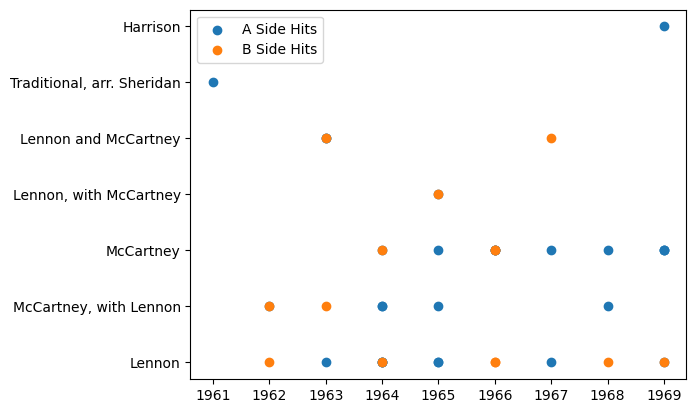

In [ ]:
a_sides = beatles_df_top50.query("hits == 'A Side Single'")
b_sides = beatles_df_top50.query("hits == 'B Side Single'")
plt.scatter(a_sides['Year'], a_sides['Songwriter(s)'], label='A Side Hits')
plt.scatter(b_sides['Year'], b_sides['Songwriter(s)'], label='B Side Hits')
plt.legend()
